# DNN

## Import and Reading Data

In [1]:
#pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [3]:
df_train = pd.read_csv("../0_Datasets/Farm-Flow/train.csv")

In [4]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


In [5]:
df_test = pd.read_csv("../0_Datasets/IoMT_AI_IDS/Flows/test.csv")

In [6]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.817503,-0.933607,-0.737280,-0.746950,-0.482514,-0.403444,-0.452983,0.232052,-0.823616,0.002967,...,-0.509298,-0.818664,-0.530994,-0.514251,-0.745970,-0.788171,-0.795646,-0.992819,slowloris,1
1,-0.579055,-0.414215,-0.641823,-0.658372,0.552561,0.327246,0.436698,0.232052,-0.572601,0.002967,...,2.218502,1.967492,1.889052,1.878208,-0.513383,-0.298488,1.971296,0.806197,apachekiller,1
2,-0.674434,-0.621972,-0.450908,-0.746950,-0.572623,-0.467054,-0.530434,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
3,-0.674434,-0.621972,-0.450908,-0.746950,-0.572631,-0.467059,-0.530441,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
4,-0.674434,-0.621972,-0.450908,-0.746950,-0.572633,-0.467061,-0.530443,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20291,-0.674434,-0.621972,-0.450908,-0.746950,-0.572961,-0.467292,-0.530725,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,normal,0
20292,-0.674434,-0.621972,-0.450908,-0.746950,-0.572624,-0.467055,-0.530436,0.232052,-0.680179,0.002967,...,-0.517239,-0.823663,-0.557857,-0.528041,-0.792487,-0.886108,-0.805688,-0.992819,slowloris,1
20293,-0.579055,-0.414215,-0.641823,-0.658372,0.564715,0.335826,0.447145,0.232052,-0.572601,0.002967,...,2.218502,1.949165,1.872970,1.893964,-0.513383,-0.298488,1.952886,0.806197,apachekiller,1
20294,-0.626744,-0.518094,-0.737280,-0.658372,0.407513,0.224853,0.312025,0.232052,-0.620413,0.002967,...,2.218502,1.936669,2.266596,2.316445,-0.559901,-0.396424,1.940334,0.806197,apachekiller,1


-----
## Create Model and Train Model

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

In [8]:
X_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

X = df_train[X_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [9]:
X_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

X_val = df_test[X_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
X_test.shape,y_test.shape

((11837, 33), (11837,))

In [12]:
X_train.shape,y_train.shape

((35509, 33), (35509,))

In [13]:
X_val.shape, y_val.shape

((20296, 33), (20296,))

In [14]:
%%time

# Define the model
model = Sequential()
model.add(Dense(33, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Define early stopping
monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Saved-Models/Farm-Flow_DNN-Deep-Neural-Network_Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, callbacks=[monitor, checkpoint])



Epoch 1/100


70/70 [==============================] - 2s 6ms/step - loss: 0.5697 - accuracy: 0.7661 - val_loss: 0.3789 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 2/100
67/70 [===========================>..] - ETA: 0s - loss: 0.3817 - accuracy: 0.8846

C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8856 - val_loss: 0.3025 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.9048 - val_loss: 0.2614 - val_accuracy: 0.9248 - lr: 0.0010
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.9114 - val_loss: 0.2332 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.9172 - val_loss: 0.2107 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.9195 - val_loss: 0.1956 - val_accuracy: 0.9351 - lr: 0.0010
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9244 - val_loss: 0.1881 - val_accuracy: 0.9364 - lr: 0.0010
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 0.2287 - accura

In [15]:
# Load the best saved model
best_model = load_model('Saved-Models/Farm-Flow_DNN-Deep-Neural-Network_Model.h5')

# Evaluate the best saved model
score = best_model.evaluate(X_val, y_val)
print('')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

635/635 [==============================] - 1s 784us/step - loss: 5.3644 - accuracy: 0.4514

Test loss: 5.364365577697754
Test accuracy: 0.45141899585723877


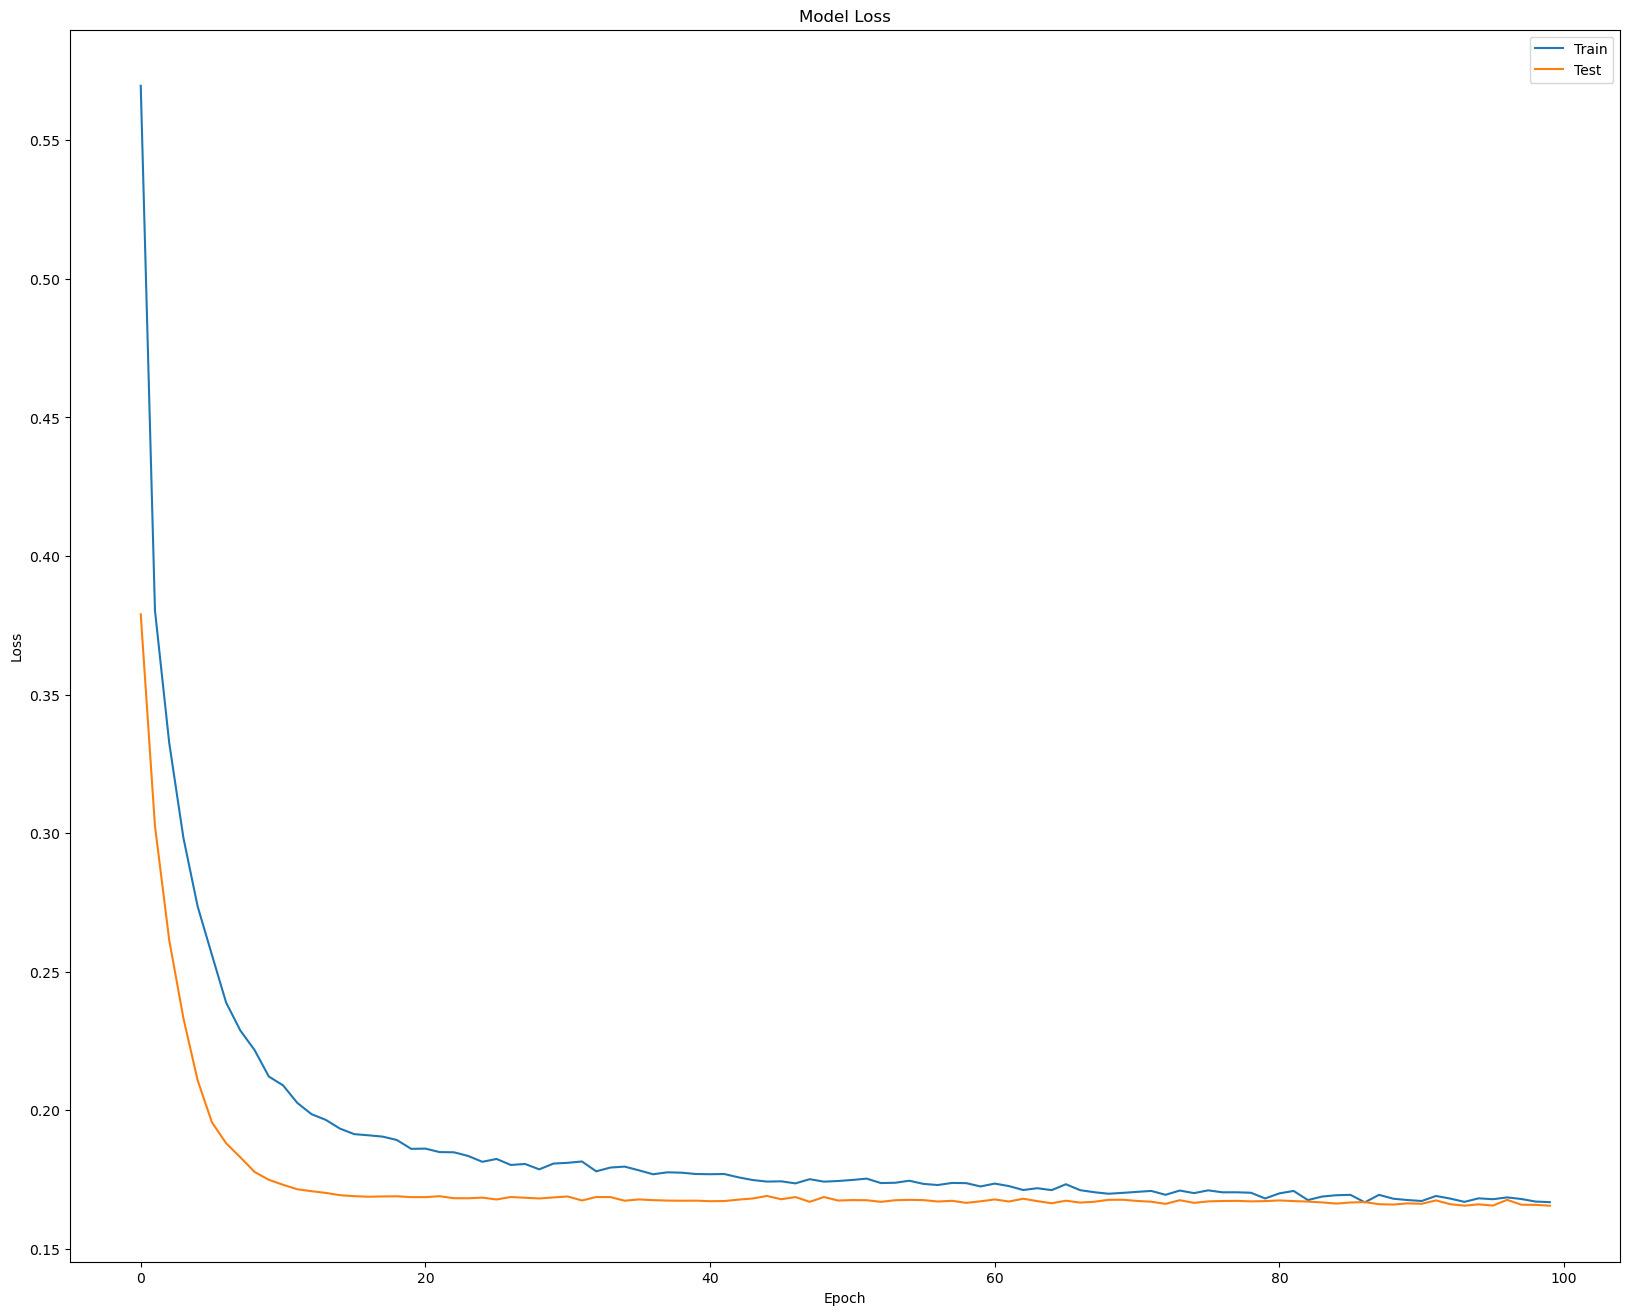

In [16]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Results

In [17]:
pred = model.predict(X_val)

635/635 [==============================] - 1s 703us/step


In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """    
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [19]:
pred = np.round(pred).astype(int)
calculate_metrics("Binary - DNN", y_val, pred)

--- Performance of Binary - DNN ---
Accuracy : 45.14%
Precision: 51.03%
Recall: 79.63%
F1-score: 62.2%
Balanced accuracy: 39.82%
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8791
           1       0.51      0.80      0.62     11505

    accuracy                           0.45     20296
   macro avg       0.26      0.40      0.31     20296
weighted avg       0.29      0.45      0.35     20296



In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Malicious'])

    # Plot size
    fig, ax = plt.subplots(figsize=(4,4))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=10, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=10, fontsize=11)
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Malicious'])
    ax.set_yticklabels(['Normal', 'Malicious'])
    
    ax.tick_params(axis='x', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', va='center')
    ax.tick_params(axis='y', pad=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)   

In [21]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


[CMATRIX] Decision Tree Confusion Matrix


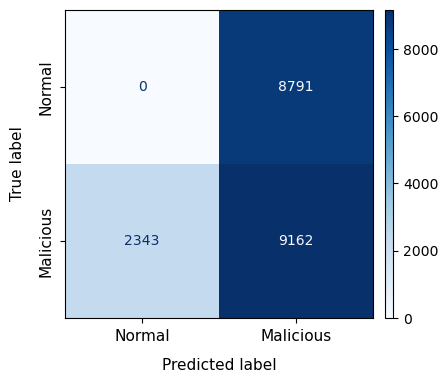

In [22]:
print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, pred, 1)